# Media Mix Modelling

In [132]:
#Function to obtain locally imported modules and version from Notebook

import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
            
        yield name
imports = list(set(get_imports()))
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

In [138]:
print('#'*20)
print('Package Requiements')
print('#'*20)
requirements

####################
Package Requiements
####################


[('jax', '0.4.18'),
 ('matplotlib', '3.6.1'),
 ('numpy', '1.26.4'),
 ('numpyro', '0.9.2'),
 ('pandas', '2.1.4'),
 ('plotly', '5.9.0'),
 ('scikit-learn', '1.2.2'),
 ('scipy', '1.12.0'),
 ('seaborn', '0.11.1'),
 ('statsmodels', '0.14.0')]

# Install required packages

In [270]:
#pip install lightweight_mmm
#pip install jax==0.4.18 jaxlib==0.4.18 numpyro==0.9.2

  Using cached lightweight_mmm-0.1.9-py3-none-any.whl.metadata (18 kB)
  Using cached arviz-0.19.0-py3-none-any.whl.metadata (8.9 kB)
  Using cached jax-0.4.31-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.4.31-cp311-cp311-win_amd64.whl.metadata (1.0 kB)
  Using cached matplotlib-3.6.1-cp311-cp311-win_amd64.whl.metadata (6.8 kB)
  Using cached numpyro-0.15.2-py3-none-any.whl.metadata (36 kB)
  Using cached seaborn-0.11.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Using cached h5netcdf-1.3.0-py3-none-any.whl.metadata (13 kB)
  Using cached xarray_einstats-0.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
Using cached lightweight_mmm-0.1.9-py3-none-any.whl (105 kB)
Using cached matplotlib-3.6.1-cp311-cp311-win_amd64.whl (7.2 MB)
Using cached seaborn-0.11.1-py3-none-any.whl

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\B\\anaconda3\\Lib\\site-packages\\matplotlib\\_c_internal_utils.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



# Import Required Packages

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error as mae
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)

import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
mmm_data = pd.read_csv('mmm-data.csv')
mmm_data = mmm_data.sort_values('date').reset_index(drop=True)

In [3]:
display(mmm_data)#.head(5))

date        revenue        sales            ppc        audio  \
0    2021-04-06  158114.703977  6383.632381   20847.170468  6712.070406   
1    2021-04-13  147104.213501  6251.088147   20092.564981  7175.978317   
2    2021-04-20  171418.537449  7442.020909   23909.892313  5940.313003   
3    2021-04-27  151357.842881  6568.636913   16987.943264  7519.485284   
4    2021-05-04  174664.757311  7585.449155   25352.214931  5899.261994   
5    2021-05-11  179433.973955  7306.371193   22258.505230  7687.946734   
6    2021-05-18  161993.984154  7083.297746   23627.027133  6924.487982   
7    2021-05-25  179276.498134  7662.626655   23187.103110  7248.644484   
8    2021-06-01  169424.048728  7237.731598   17317.530221  8879.748396   
9    2021-06-08  171565.177208  7467.410111   22353.268881  7951.713748   
10   2021-06-15  171820.025413  7166.143832   20226.420877  7212.372192   
11   2021-06-22  167886.711707  7041.677813   22685.870853  8243.295421   
12   2021-06-29  165864.348978  6958.983425   19323.270392  5995.986261   
13   2021-07-06  171023.652047  7199.113232   17315.269295  6045.364247   
14   2021-07-13  160652.880152  6932.369793   20263.817395  9483.579736   
15   2021-07-20  146432.323800  6104.988239   21082.300191  7728.307956   
16   2021-07-27  151556.565619  6473.629703   19133.638266  7265.848188   
17   2021-08-03  161999.360212  6974.180645   21115.567477  8627.470490   
18   2021-08-10  146956.125149  6333.761575   21371.749919  6516.045010   
19   2021-08-17  158930.086155  6839.233254   22535.750977  7764.637282   
20   2021-08-24  142396.968847  6037.253107   23661.938838  8151.461293   
21   2021-08-31  155094.984715  6775.792034   17062.279742  7153.683088   
22   2021-09-07  140690.210840  6295.734847   15608.221925  6601.864618   
23   2021-09-14  146135.846752  6307.843162   17542.924050  7553.768254   
24   2021-09-21  148963.756200  6436.194447   24250.319364  6864.551751   
25   2021-09-28  165434.096397  6993.607816   18371.858001  7114.049550   
26   2021-10-05  164820.848077  7206.211934   17477.915087  6533.318472   
27   2021-10-12  158972.612756  7018.757718   20839.863185  6336.424865   
28   2021-10-19  157127.754358  6785.655533   21742.458471  6677.502553   
29   2021-10-26  148724.344525  6604.075641   19620.659736  5631.620227   
30   2021-11-02  174709.426868  7705.958562   21607.894398  6107.426018   
31   2021-11-09  173237.979840  7578.715776   21548.524663  6407.355019   
32   2021-11-16            NaN          NaN   21798.544965  7139.043482   
33   2021-11-23  166232.063388  7221.176073 -100000.000000  5965.001973   
34   2021-11-30  173753.656155  7716.091024   18604.286533  6065.842396   
35   2021-12-07  166733.985902  7507.267104   16166.373786  7938.780078   
36   2021-12-14  159345.133282  7010.682320   14626.843585  7032.054745   
37   2021-12-21  167214.117790  7379.016174   19799.483546  7284.425213   
38   2021-12-28  168627.170515  7419.126417   18673.513294  6238.566155   
39   2022-01-04  158362.566759  7071.171867   15007.203321  5799.336617   
40   2022-01-11  151103.958613  6803.613154   20940.901952  5562.461506   
41   2022-01-18  139764.147482  6109.938326   19963.578698  6409.220456   
42   2022-01-25  157062.353461  6943.021124   18452.530343  7062.230986   
43   2022-02-01  175472.174114  7888.408929   17447.146763  8036.444871   
44   2022-02-08  175282.906023  7875.846435   24433.031707  5220.803678   
45   2022-02-15  194707.222215  8808.886776   18066.664277  7920.170709   
46   2022-02-22  171922.924198  7734.474357   13747.798856  6636.757122   
47   2022-03-01  144462.950758  6253.779799   18644.788094  7325.812362   
48   2022-03-08  142494.307704  6145.951430   19080.476175  6234.517959   
49   2022-03-15  150603.167692  6798.872415   20919.576651  6796.938119   
50   2022-03-22  139942.674143  6171.057340   18243.811908  5731.068920   
51   2022-03-29  154466.066034  6400.800849   15722.078548  6912.441226   
52   2022-04-05  157486.166657  6647

In [4]:
#show datatpe and missing values
print(mmm_data.info())
display(mmm_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          153 non-null    object 
 1   revenue       151 non-null    float64
 2   sales         151 non-null    float64
 3   ppc           153 non-null    float64
 4   audio         152 non-null    float64
 5   programmatic  152 non-null    float64
 6   price         153 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.5+ KB
None


revenue        sales            ppc        audio  programmatic  \
count     151.000000   151.000000     153.000000   152.000000    152.000000   
mean   161804.063980  7032.664386   19047.023016  6969.421275   4836.321974   
std     11244.675225   539.657248   10091.521878   790.161838   1281.703612   
min    139618.945260  6037.253107 -100000.000000  5220.803678    873.783918   
25%    153404.116374  6618.147231   18066.664277  6458.506133   4097.101101   
50%    161333.898163  6997.964722   19963.578698  6930.472822   4995.658228   
75%    170534.680782  7399.268323   21798.544965  7518.886398   5659.460581   
max    194707.222215  8808.886776   26009.795252  9483.579736   7123.423274   

            price  
count  153.000000  
mean    23.006852  
std      0.343621  
min     22.371740  
25%     22.681778  
50%     22.998835  
75%     23.310996  
max     23.616535

# Feature Engineering

In [5]:
#Creation of additional features
mmm_data['date'] = pd.to_datetime(mmm_data['date'])
mmm_data['calendar_month'] = mmm_data['date'].dt.month
mmm_data['calendar_year'] = mmm_data['date'].dt.year

In [6]:
display(mmm_data.head(2))

date        revenue        sales           ppc        audio  \
0 2021-04-06  158114.703977  6383.632381  20847.170468  6712.070406   
1 2021-04-13  147104.213501  6251.088147  20092.564981  7175.978317   

   programmatic      price  calendar_month  calendar_year  
0   5223.235285  22.923563               4           2021  
1   3229.303912  22.913089               4           2021

# Perform Exploratory Data Analysis (EDA)

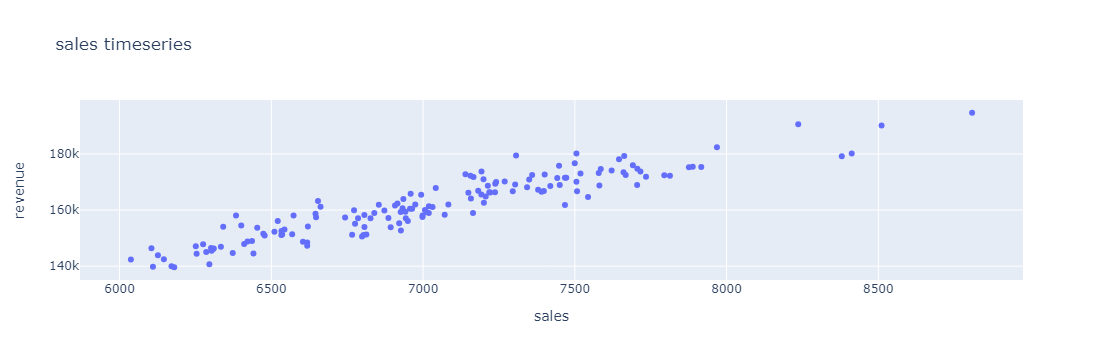

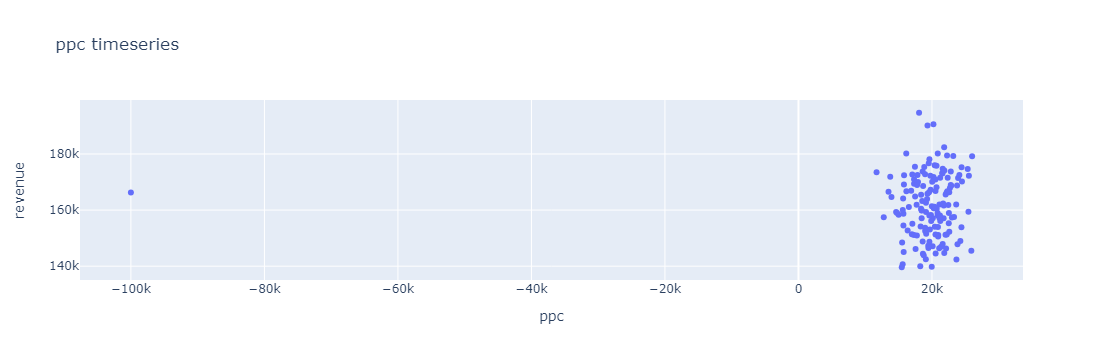

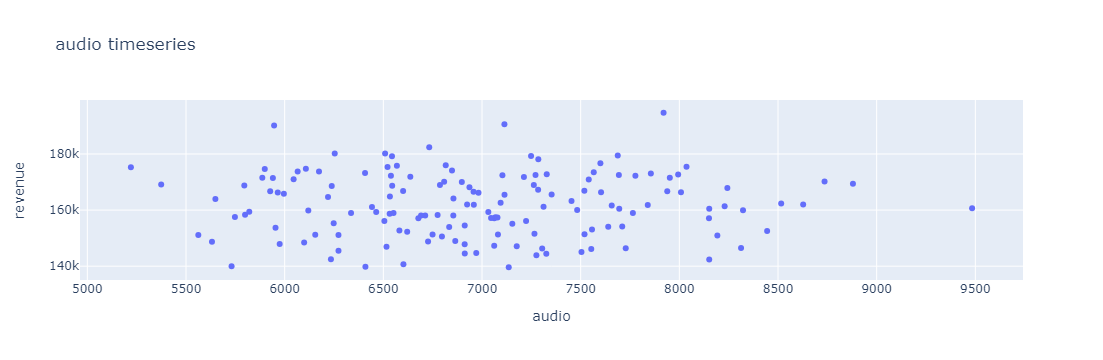

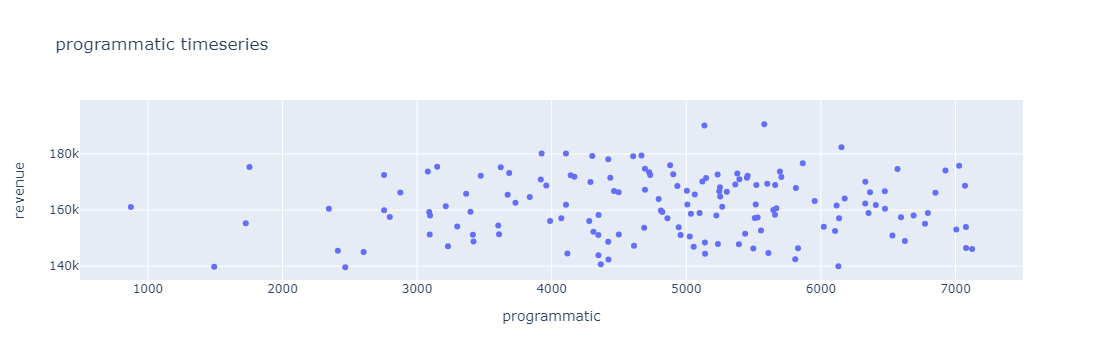

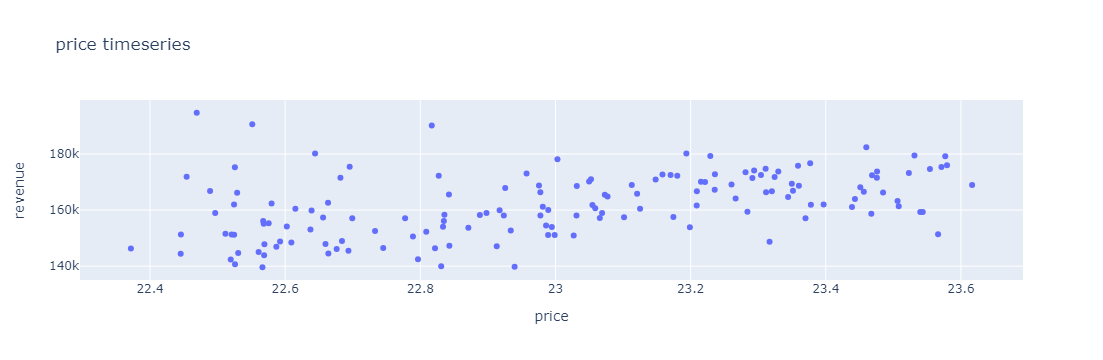

In [8]:
features_list = ['sales', 'ppc', 'audio', 'programmatic', 'price']
for feature in features_list:
    fig = px.scatter(mmm_data, x=feature, y='revenue', title=f"{feature} timeseries")
    fig.show()

In [9]:
# Notes:
# ppc does not seem to be effective - low correlation with revenue
# we can see some effect relating to seasonality as calandar month has a relatively high correlation compared to other features

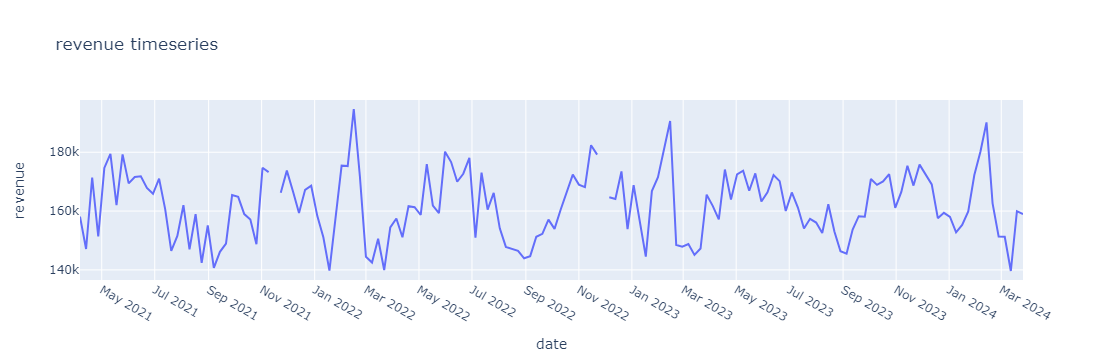

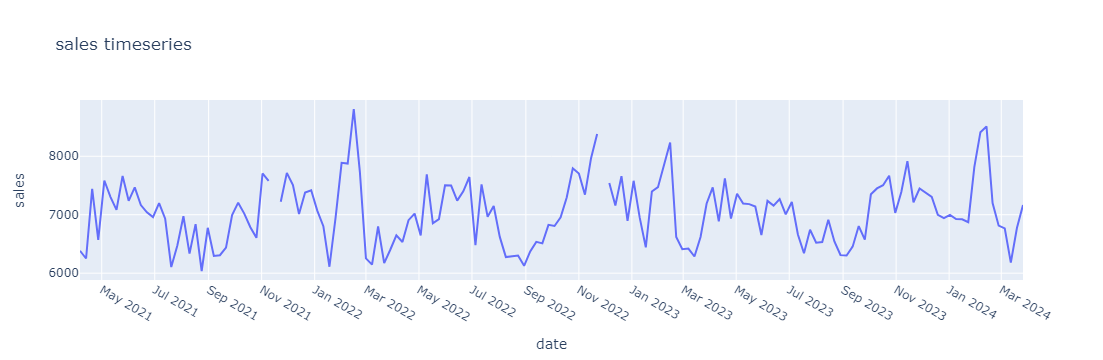

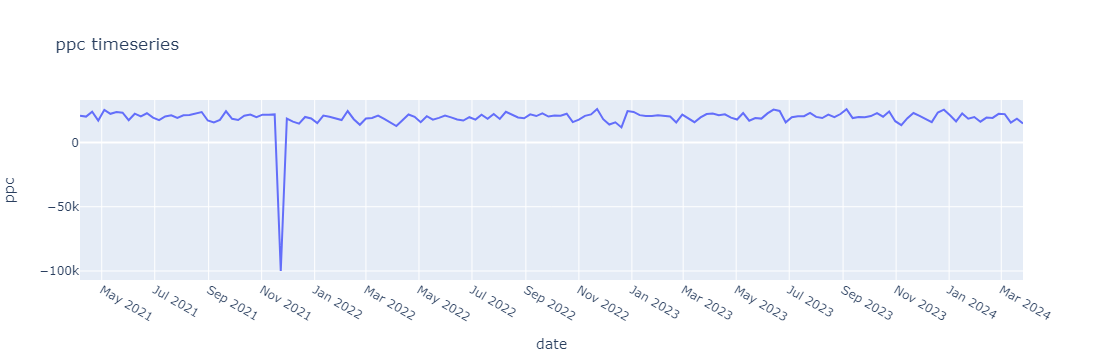

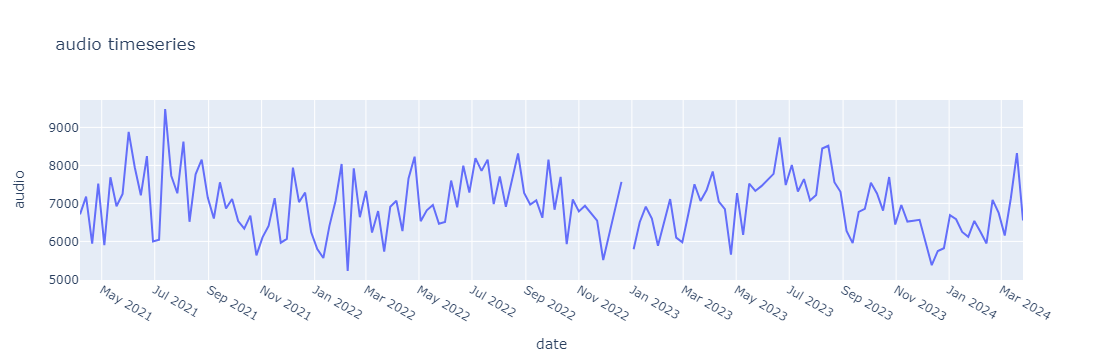

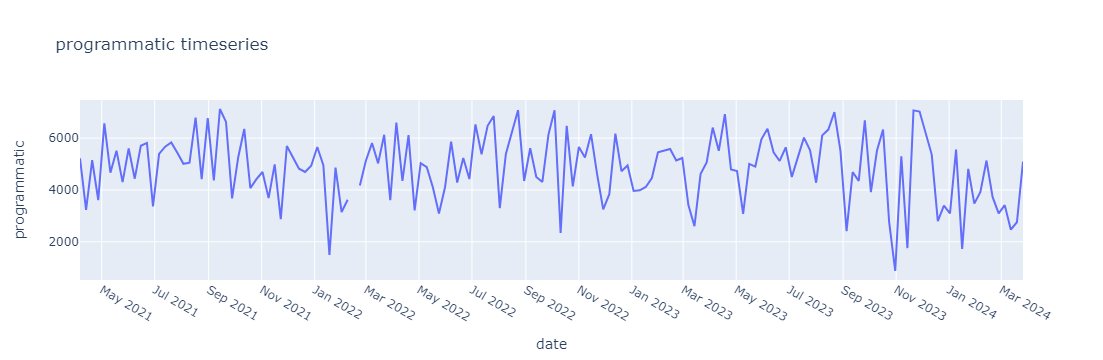

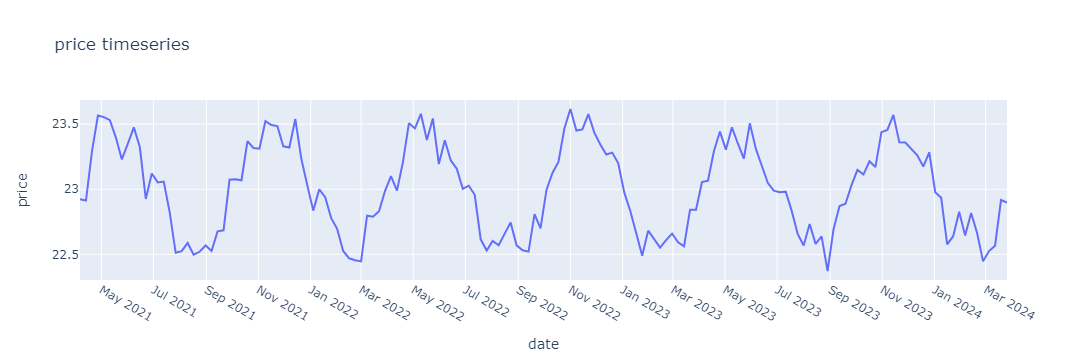

In [10]:
# perform visual analysis of features
# view timeseries
features_list = ['revenue','sales', 'ppc', 'audio', 'programmatic', 'price']
for feature in features_list:
    fig = px.line(mmm_data, x='date', y=feature, title=f"{feature} timeseries")
    fig.update_xaxes(nticks=24)
    fig.show()

In [11]:
# Price Notes
# pricing follows a tight range between 22.375-23.61 and follows some seasonality trend
# prices peak during May/Jun & Nov/Dec
# prices are at the lowest point Aug/Sep & Feb/Mar

# Missing Data Notes:
# 2 missing revenue and sales records respectively
# 1 erroneous ppc spend record (-100,000 spend)
# 1 missing audio spend value
# 1 missing programmatic spend value
# These will be imputed using categorical mean imputation technique - grouping by calendar year and calendar month

# Perform Data Preprocessing

In [12]:
# Applying the condition using apply and lambda
# Convert erroneous ppc value to nan
mmm_data['ppc'] = mmm_data['ppc'].apply(lambda x: np.nan if x == -100000 else x)

# Perform categorical mean imputation on all feature columns
for feature in features_list:
    mmm_data[feature] = mmm_data[[feature,'calendar_month','calendar_year']].groupby(['calendar_month', 'calendar_year']).transform(lambda x: x.fillna(x.mean()))



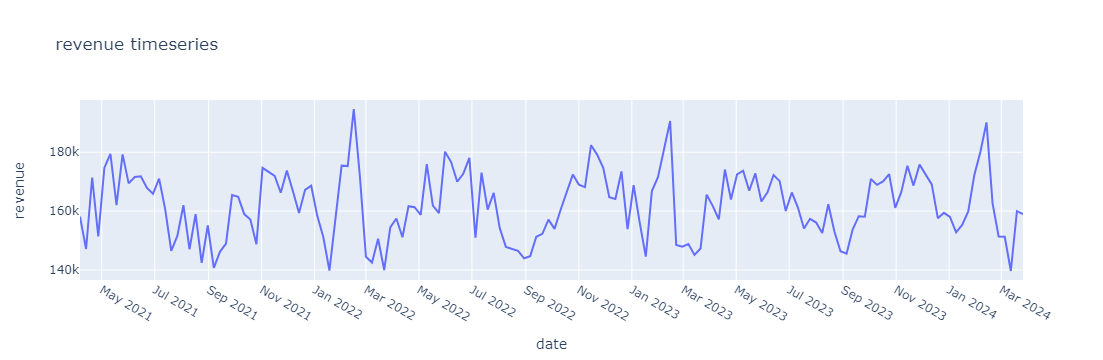

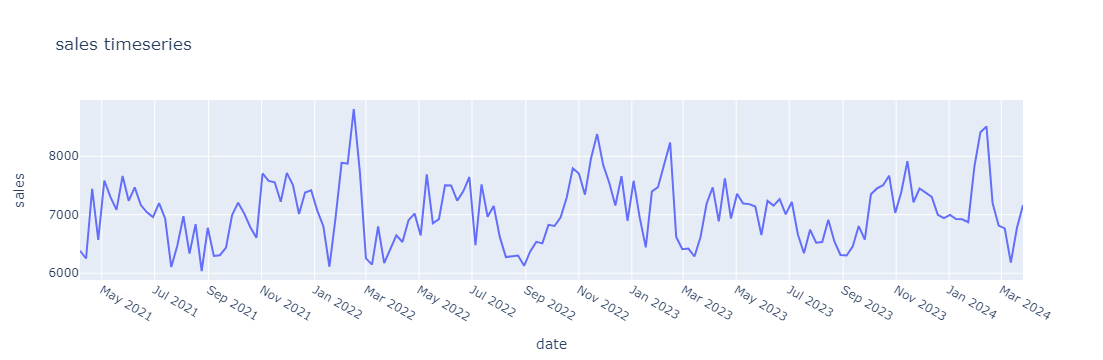

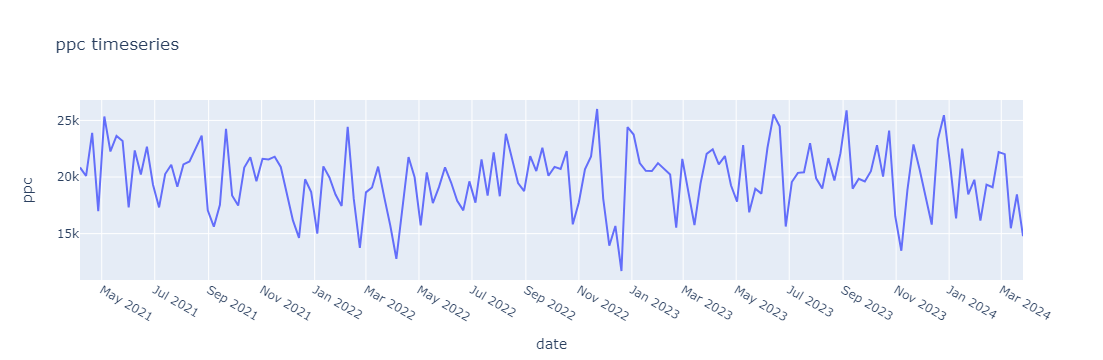

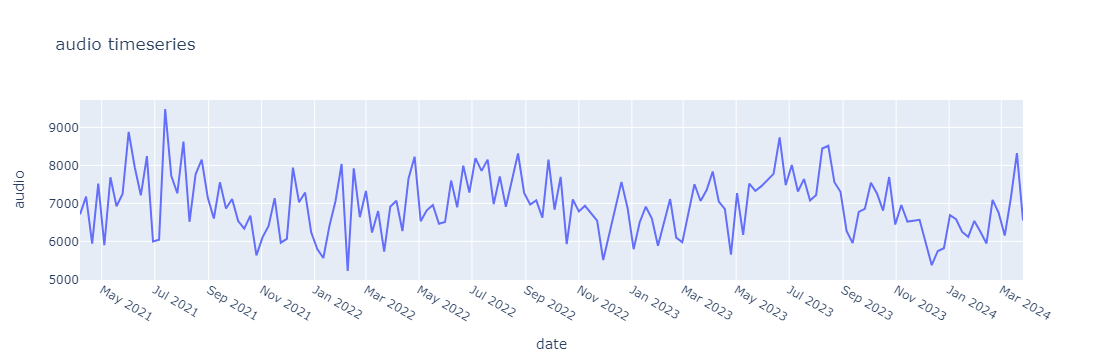

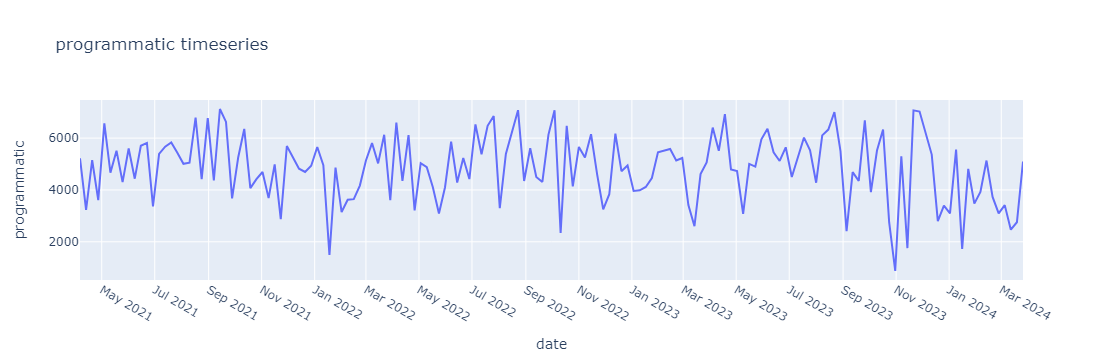

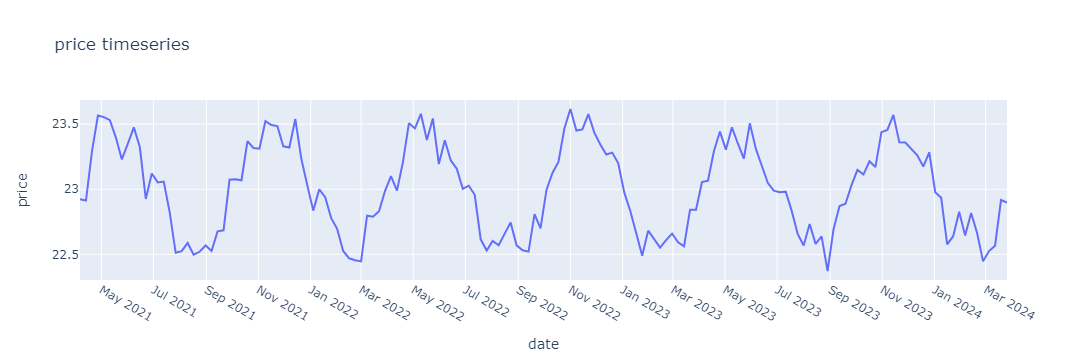

In [13]:
#Check result of categorical mean imputation
for column in features_list:
    fig = px.line(mmm_data, x='date', y=column, title=f"{column} timeseries")
    fig.update_xaxes(nticks=24)
    fig.show()

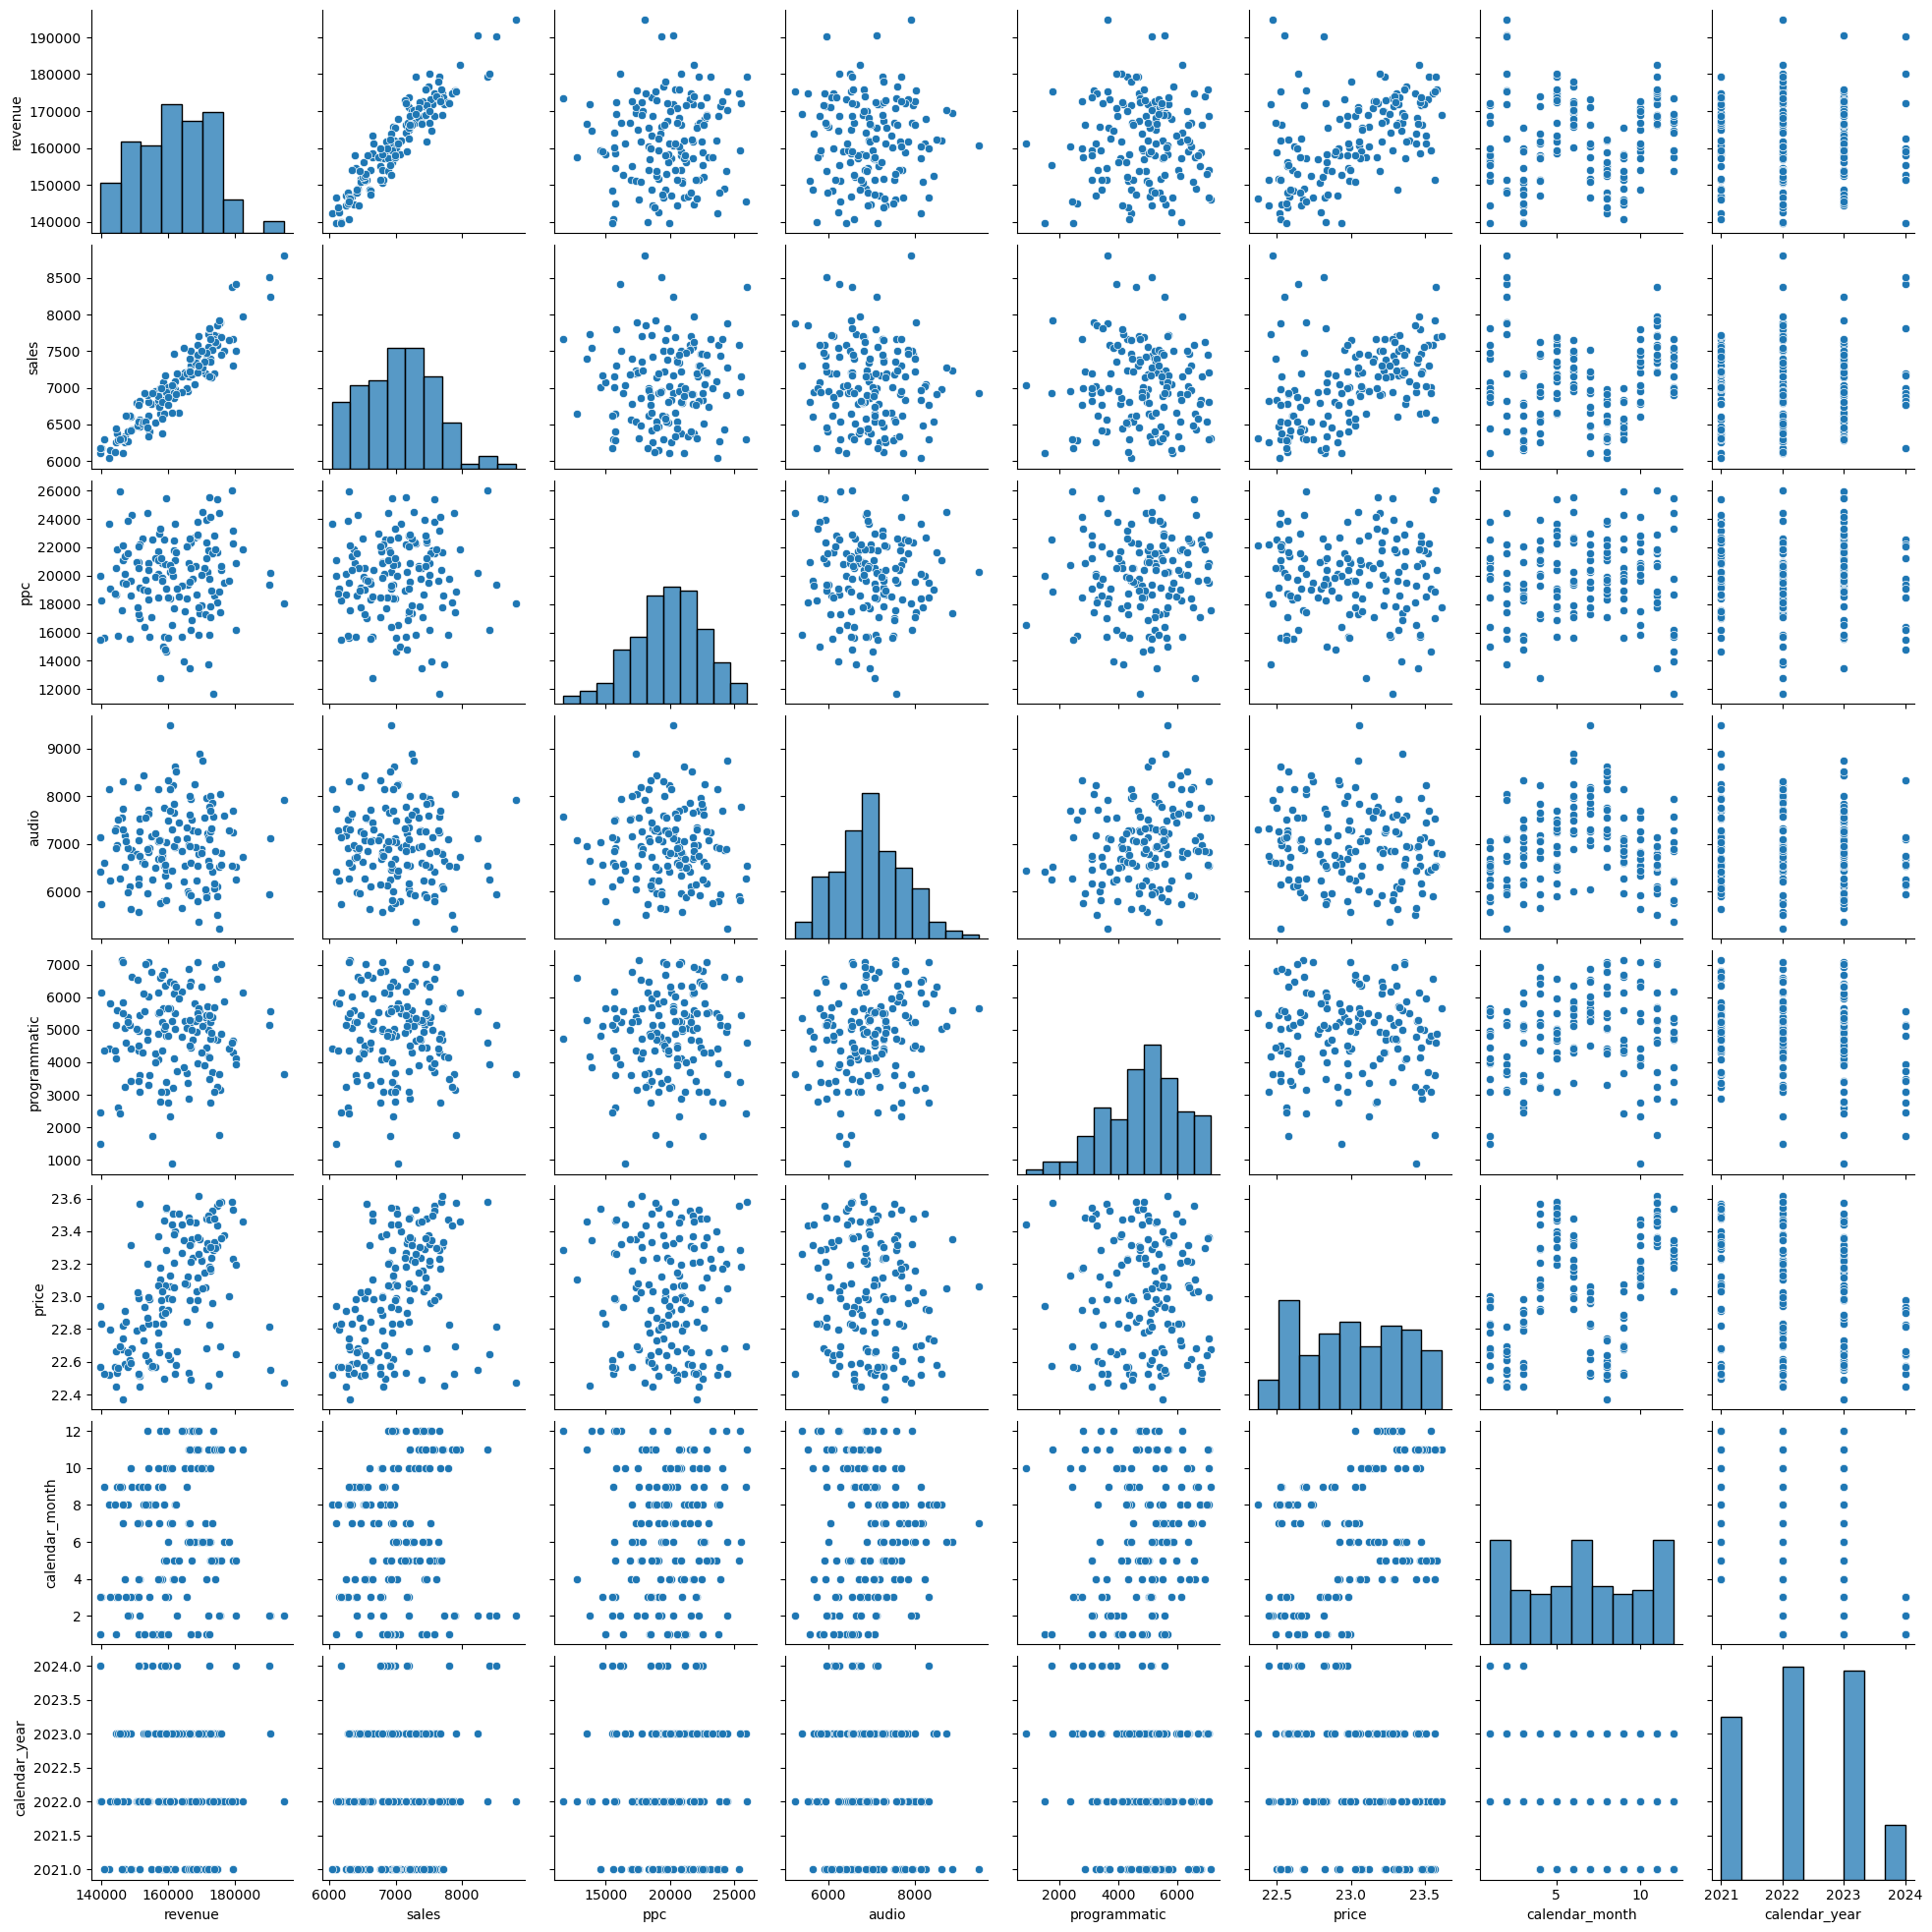

In [198]:
sns.pairplot(mmm_data)

In [244]:
#Proof of concept
#Create correlation analysis by isolating important features and use conditional formatting to visualise effect

cm = sns.light_palette('green', as_cmap=True)
correlation_analysis=pd.DataFrame(mmm_data[['revenue','ppc','audio','programmatic','price','calendar_month','calendar_year']].corr()['revenue']).reset_index()
correlation_analysis.columns=['Impacting Variable','Degree of Linear Impact (Correlation)']
correlation_analysis=correlation_analysis[correlation_analysis['Impacting Variable']!= 'revenue']
correlation_analysis=correlation_analysis.sort_values('Degree of Linear Impact (Correlation)', ascending=False)
correlation_analysis.style.background_gradient(cmap=cm)

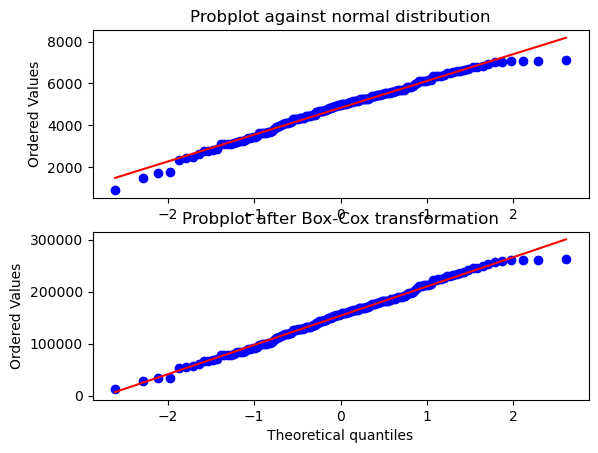

In [208]:
#Perform box-cox transformation

fig = plt.figure()
axl = fig.add_subplot(211)
x = mmm_data['programmatic']
prob = stats.probplot(x, dist=stats.norm, plot=axl)
axl.set_xlabel('')
axl.set_title('Probplot against normal distribution')
#Using boxcox to transform the data so its closest to normal distribution
ax2 = fig.add_subplot(212)
mmm_data['programmatic'], _ = stats.boxcox(x)
prob = stats.probplot(mmm_data['programmatic'], dist=stats.norm, plot=ax2)
print("")
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

In [ ]:
#Look into causation by building OLS model

In [139]:
results = smf.ols('revenue ~ ppc + audio + programmatic + price + calendar_month', data=mmm_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     8.985
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           1.80e-07
Time:                        02:55:16   Log-Likelihood:                -1623.4
No. Observations:                 153   AIC:                             3259.
Df Residuals:                     147   BIC:                             3277.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.376e+05   6.12e+04     -3.

In [ ]:
#Model features has high P values

# Multiple Linear Regression Model

In [154]:
inputs = ['ppc',
    'audio','programmatic',
          'price','calendar_month'
          ,'calendar_year'
]

X = mmm_data[inputs]
y = mmm_data['revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False,test_size=0.4)

model = LinearRegression()

# Initialise the Scaler
scaler = MinMaxScaler()
#scale data
X_train = scaler.fit_transform(X_train)

#display(X_train)

model.fit(X_train, y_train)

X_test = scaler.transform(X_test)

print(f"R-Squared Train: {model.score(X_train, y_train)}")
print(f"R-Squared Test: {model.score(X_test, y_test)}")


R-Squared Train: 0.24403905771994527
R-Squared Test: 0.191561619187688


In [155]:
print('#'*70)
print(f"Columns:\n{X.columns}")
print('#'*70)
print(f"Model Coefficients:\n{model.coef_}")
print('#'*70)
print(f"Model Intercept:\n{model.intercept_}")
print('#'*70)

######################################################################
Columns:
Index(['ppc', 'audio', 'programmatic', 'price', 'calendar_month',
       'calendar_year'],
      dtype='object')
######################################################################
Model Coefficients:
[ 5272.93945455  5869.56301401 -2567.22331341 19161.35101741
  -785.77262438  3601.90233191]
######################################################################
Model Intercept:
147621.43368427176
######################################################################


# Validate Multiple Linear Regression Model Using Test Dataset

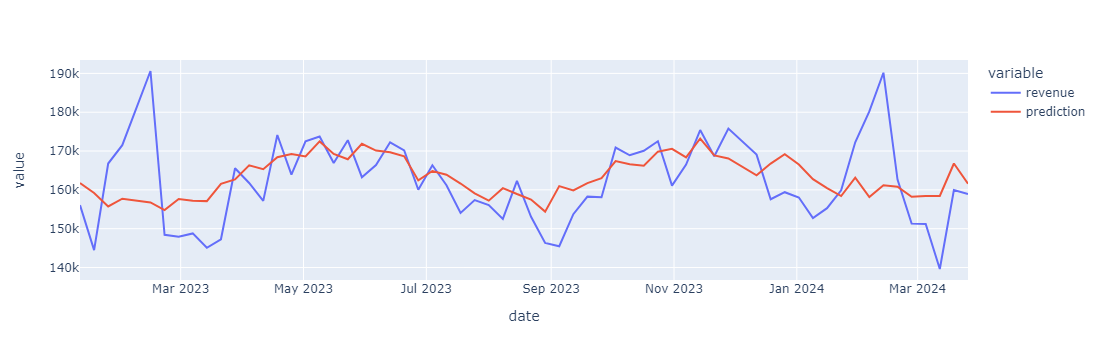

R-Squared:  19.156161918768788
RMSE     :  9533.238896450512
MSE      :  90882643.85679697
MAPE      :  4.425783734050213
MAE      :  7155.265391621028


In [79]:
X = scaler.transform(X)
mmm_data['prediction'] = model.predict(X)
actual_pred = ['revenue', 'prediction']
fig = px.line(mmm_data.tail(len(X_test)), x='date', y=actual_pred)
fig.show()

print('R-Squared: ', metrics.r2_score(mmm_data['revenue'].tail(len(X_test)), mmm_data['prediction'].tail(len(X_test)))*100)
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(mmm_data['revenue'].tail(len(X_test)), mmm_data['prediction'].tail(len(X_test)))))
print('MSE      : ', metrics.mean_squared_error(mmm_data['revenue'].tail(len(X_test)), mmm_data['prediction'].tail(len(X_test))))
print('MAPE      : ', metrics.mean_absolute_percentage_error(mmm_data['revenue'].tail(len(X_test)), mmm_data['prediction'].tail(len(X_test)), multioutput='uniform_average')*100)
print('MAE      : ', metrics.mean_absolute_error(mmm_data['revenue'].tail(len(X_test)), mmm_data['prediction'].tail(len(X_test))))

# Run Multiple Linear Regression Model On Entire Dataset

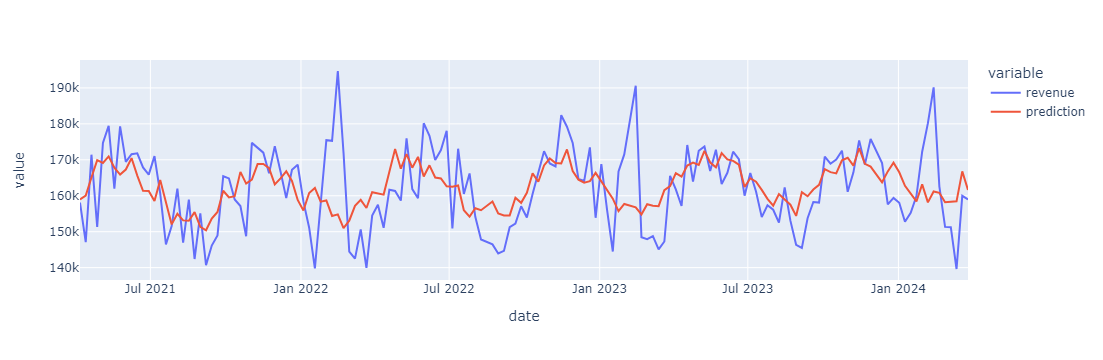

R-Squared:  22.50214474801361
RMSE     :  9869.982542323272
MSE      :  97416555.38576618
MAPE      :  4.780800021927371
MAE      :  7715.814695663385


In [152]:
X = scaler.transform(X)
mmm_data['prediction'] = model.predict(X)
actual_pred = ['revenue', 'prediction']
fig = px.line(mmm_data, x='date', y=actual_pred)
fig.show()

print('R-Squared: ', metrics.r2_score(mmm_data['revenue'], mmm_data['prediction'])*100)
print('RMSE     : ', np.sqrt(metrics.mean_squared_error(mmm_data['revenue'], mmm_data['prediction'])))
print('MSE      : ', metrics.mean_squared_error(mmm_data['revenue'], mmm_data['prediction']))
print('MAPE      : ', metrics.mean_absolute_percentage_error(mmm_data['revenue'], mmm_data['prediction'], multioutput='uniform_average')*100)
print('MAE      : ', metrics.mean_absolute_error(mmm_data['revenue'], mmm_data['prediction']))

In [156]:
# Linear regression is simple and easy but different from reality
# results are intuitive
# however this method is not grounded in key marketing princples widely accepted by marketing industry
# PPC is a large channel - ideally would be good to break it down

# Bayesian Model

In [157]:
# ------------------------------
# Two principles to consider
# -------------------------------
# Saturation (shape effect) - The ad effect is considered to decay as the expenditure increases
# Ad-Stock (Carry over effect) - media effect on sales may lag behind the initial exposure and extend several weeks

# Principle 1: Shape effect is modelled by Hill function - transform media spending to curvature function
# Principle 2: Carry-over effect is modeled by Adstock

# Difference to linear regression is to apply transformation functions to the timeseries of media spend

# some channels may have a synergistic or antagonistic effect on each other (intertwined), 
# meaning that they amplify or diminish the impact of other channels when they are run simultaneously.

# Lightweight MMM

# Import Required Packages

In [14]:
import lightweight_mmm
import jax.numpy as jnp
import numpyro

from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils

In [80]:
SEED = 101

mdsp_cols = ['ppc','audio','programmatic']
control_vars = ['price', 'calendar_month']

media_data = mmm_data[mdsp_cols].to_numpy()
extra_features = mmm_data[control_vars].to_numpy()
target = mmm_data['revenue'].to_numpy()
cost = mmm_data[mdsp_cols].sum().to_numpy()

#X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False,test_size=0.25)

# Split and scale data
test_data_period_size = 39 #25%
split_point = len(media_data) - test_data_period_size
# Media data
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]
# Extra features
extra_features_train = extra_features[:split_point, ...]
extra_features_test = extra_features[split_point:, ...]
# Target
target_train = target[:split_point]

#scale features to ensure model is agnostic to scale of features
media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
extra_feature_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean, multiply_by=0.15)

media_data_train = media_scaler.fit_transform(media_data_train)
extra_features_train = extra_feature_scaler.fit_transform(extra_features_train)
target_train = target_scaler.fit_transform(target_train)
costs = cost_scaler.fit_transform(cost)

In [158]:
# three different approaches to saturation and media lagging effects:
# hill_adstock 
# adstock
# carryover

mmm = lightweight_mmm.LightweightMMM(model_name="carryover")

In [83]:
number_warmup=1000
number_samples=1000

In [84]:
# For replicability in terms of random number generation in sampling
# reuse the same seed for different trainings.

mmm.fit(
    media=media_data_train,
    media_prior=costs,
    target=target_train,
    extra_features=extra_features_train,
    number_warmup=number_warmup,
    number_samples=number_samples,
    media_names = mdsp_cols,
    seed=SEED
)

sample: 100%|█████████████████████| 2000/2000 [04:51<00:00,  6.87it/s, 1023 steps of size 4.12e-03. acc. prob=0.94]


In [85]:
mmm.print_summary()
#r_hat less than 1.1 - check point when running bayesian modelling


                                 mean       std    median      5.0%     95.0%     n_eff     r_hat
ad_effect_retention_rate[0]      0.54      0.26      0.57      0.14      0.96   1657.01      1.00
ad_effect_retention_rate[1]      0.49      0.29      0.49      0.02      0.90   2351.68      1.00
ad_effect_retention_rate[2]      0.51      0.30      0.50      0.10      1.00   2548.38      1.00
     coef_extra_features[0]     -0.23      0.59     -0.20     -1.12      0.74    716.51      1.00
     coef_extra_features[1]      0.01      0.02      0.01     -0.03      0.05   1174.53      1.00
              coef_media[0]      0.11      0.06      0.11      0.01      0.20   1637.42      1.00
              coef_media[1]      0.04      0.03      0.03      0.00      0.09   1704.02      1.00
              coef_media[2]      0.02      0.02      0.01      0.00      0.04   1978.09      1.00
              coef_trend[0]      0.00      0.00      0.00     -0.00      0.00   2302.48      1.00
                 ex

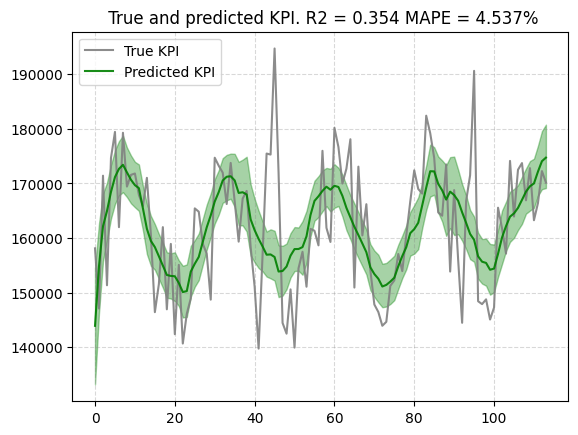

In [86]:
plot.plot_model_fit(mmm, target_scaler=target_scaler)

In [87]:
# Scale the test media data
new_predictions = mmm.predict(media=media_scaler.transform(media_data_test), 
                              extra_features=extra_feature_scaler.transform(extra_features_test), 
                              seed=SEED)

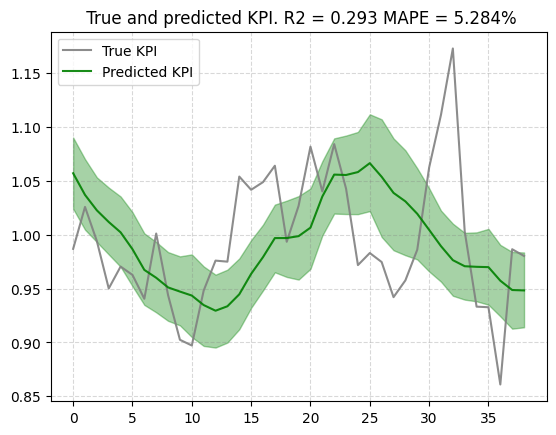

In [88]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions, 
                                  out_of_sample_target=target_scaler.transform(target[split_point:]))

In [89]:
# results are not ideal
# not sure if dataset is real or dummy

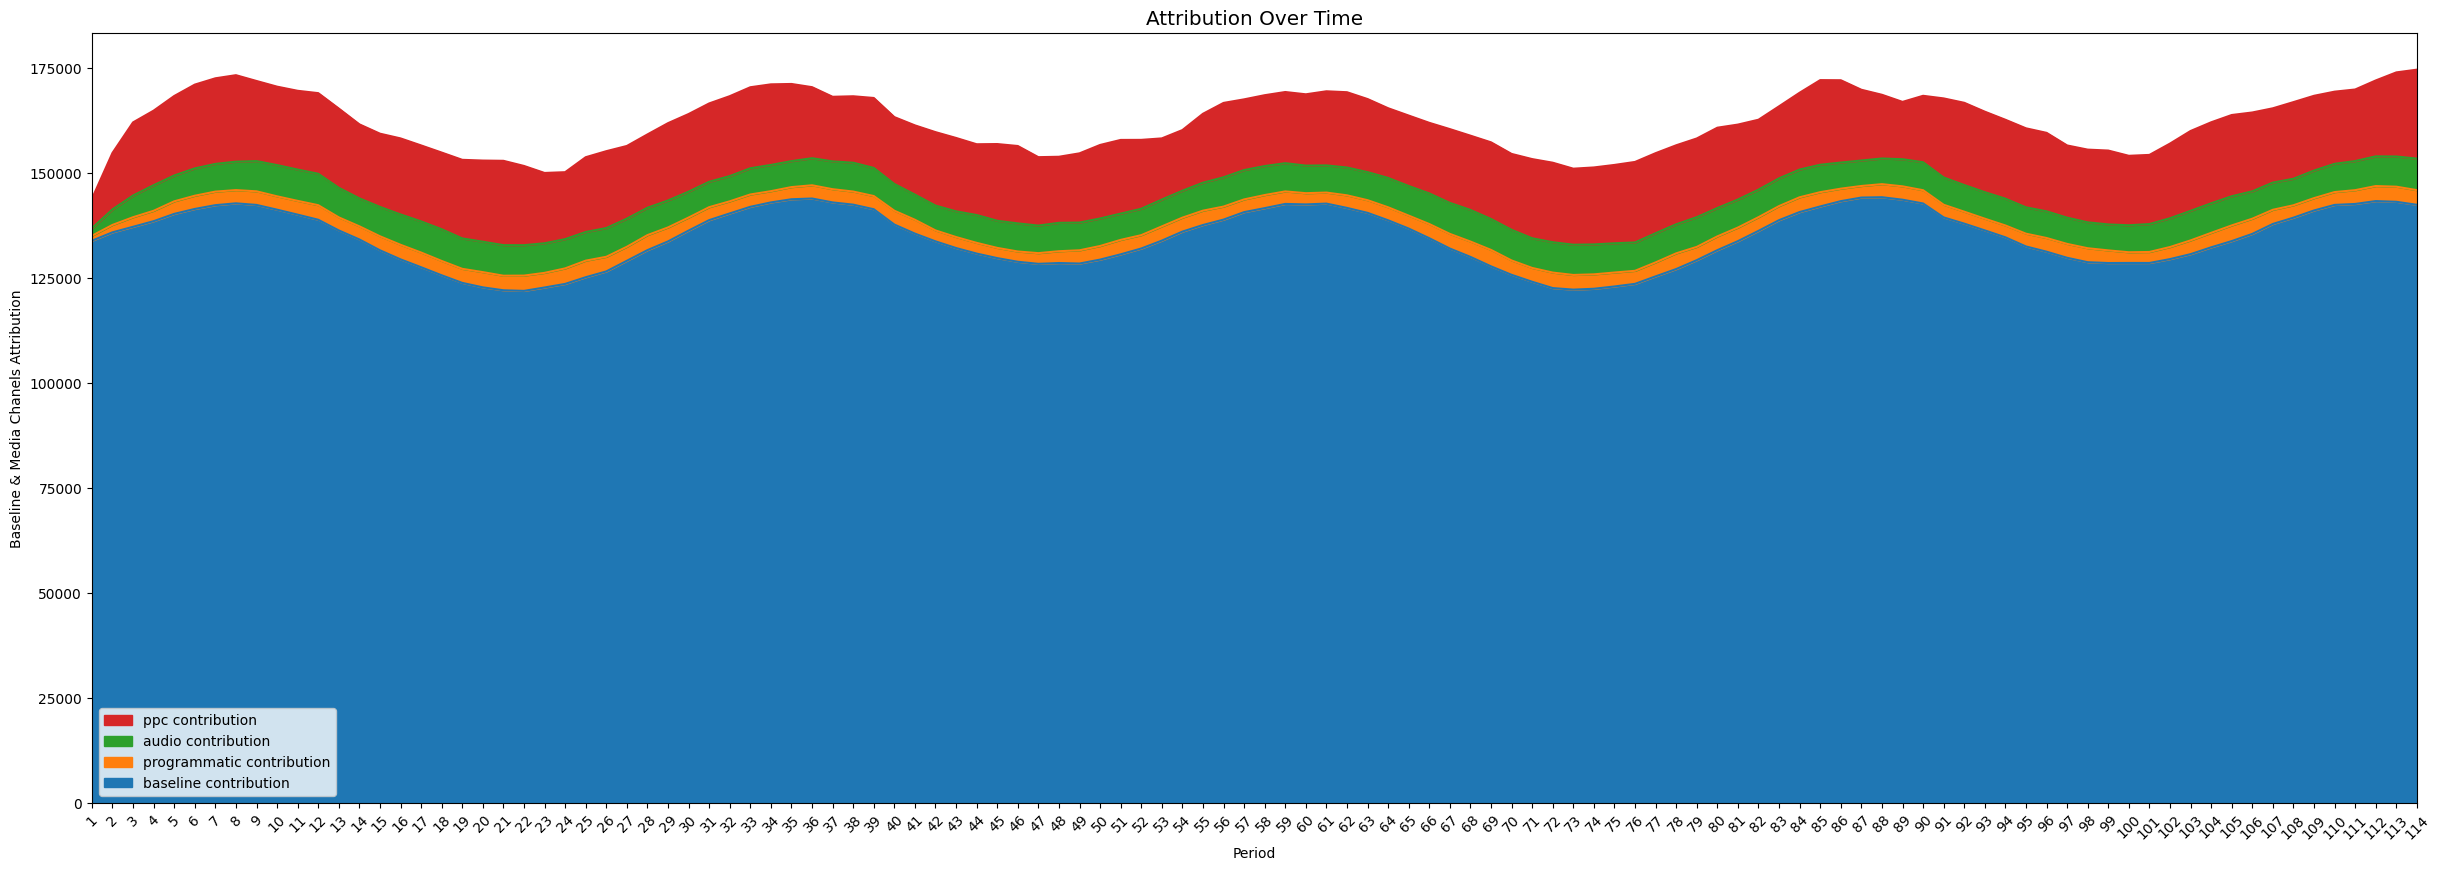

In [90]:
plot.plot_media_baseline_contribution_area_plot(media_mix_model=mmm, target_scaler=target_scaler, fig_size=(30,10))

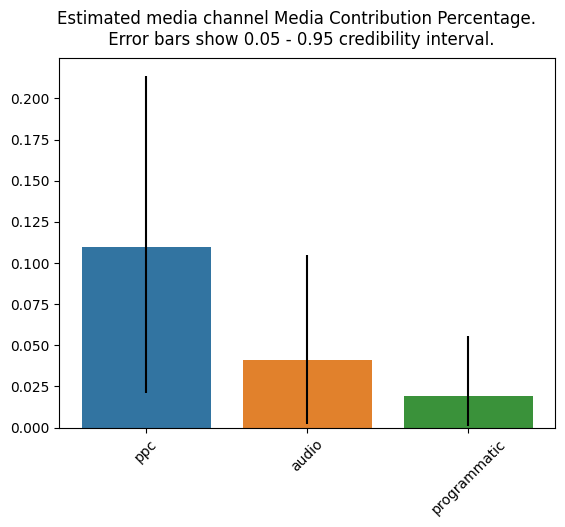

In [91]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage", channel_names=mdsp_cols)

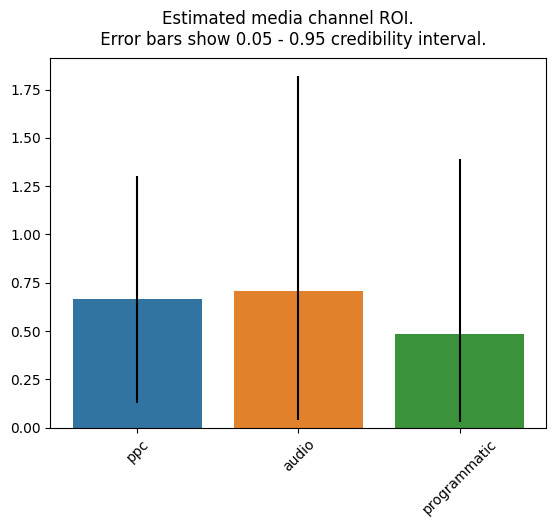

In [121]:
media_effect_hat, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)

plot.plot_bars_media_metrics(metric=roi_hat, metric_name="ROI", channel_names=mdsp_cols)

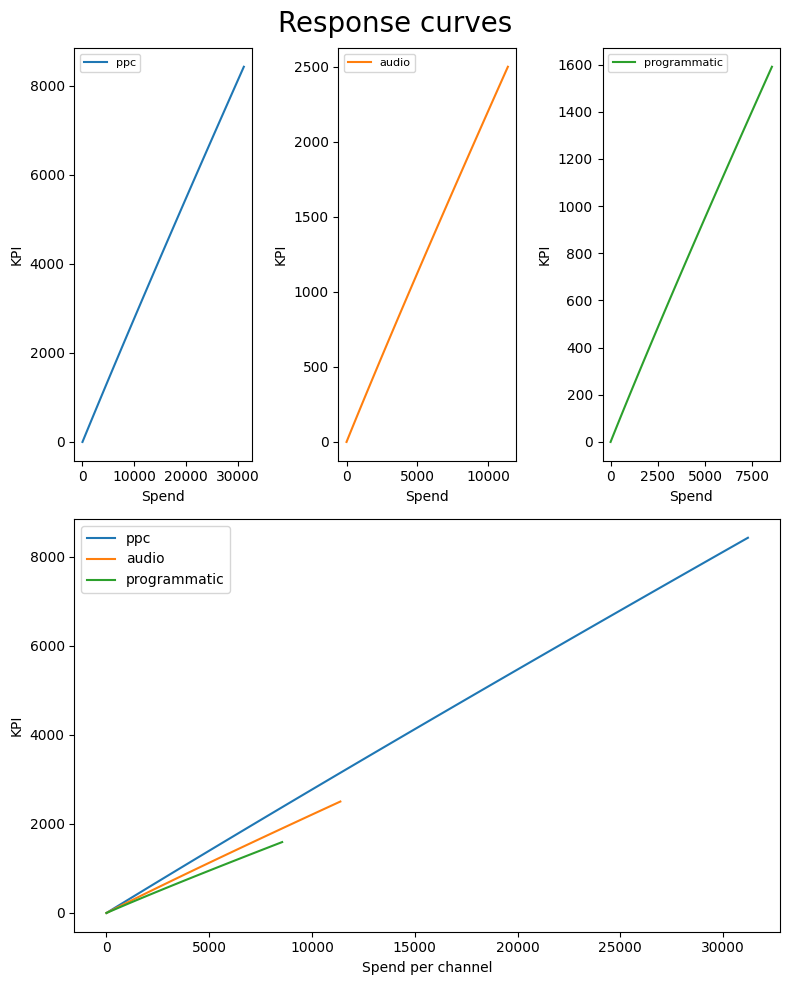

In [122]:
plot.plot_response_curves(media_mix_model=mmm, target_scaler=target_scaler, media_scaler=media_scaler)

# Optimsation

In [102]:
prices = jnp.ones(mmm.n_media_channels)

In [126]:
n_time_periods = 12
budget = jnp.sum(jnp.dot(prices,media_data.mean(axis=0)))* n_time_periods

In [127]:
# Run optimisation with the parameters of choice

solution, kpi_without_optim, previous_budget_allocation = optimize_media.find_optimal_budgets(
    n_time_periods = n_time_periods,
    media_mix_model=mmm,
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2337185.073262794
            Iterations: 19
            Function evaluations: 133
            Gradient evaluations: 19


In [105]:
# Obtain the optimal weekly allocation

optimal_budget_allocation = prices * solution.x
optimal_budget_allocation

Array([231297.17 , 100817.45 ,  47499.805], dtype=float32)

In [106]:
# plot the following
# 1) pre post optimisation budget allocation comparison for each channel
# 2) pre post optimisation predcited target variable comparison

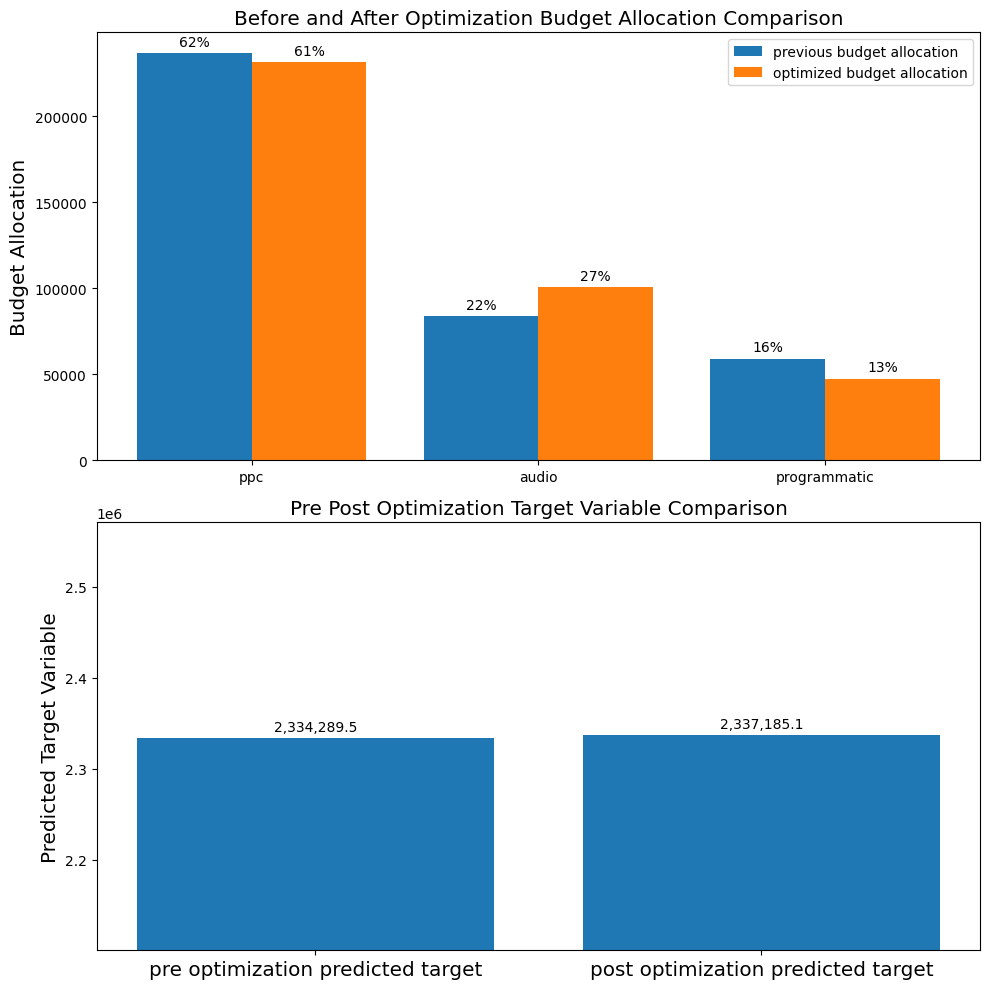

In [107]:
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm,
                                                kpi_with_optim=solution['fun'],
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_budget_allocation,
                                                previous_budget_allocation=previous_budget_allocation,
                                                figure_size=(10,10))

In [ ]:
#Lightweight MMM Package version and details

In [60]:
%pip show jax jaxlib numpyro lightweight_mmm

Name: jax
Version: 0.4.25
Summary: Differentiate, compile, and transform Numpy code.
Home-page: https://github.com/google/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: C:\Users\B\anaconda3\Lib\site-packages
Requires: ml-dtypes, numpy, numpy, opt-einsum, scipy
Required-by: lightweight-mmm, numpyro
---
Name: jaxlib
Version: 0.4.25
Summary: XLA library for JAX
Home-page: https://github.com/google/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: C:\Users\B\anaconda3\Lib\site-packages
Requires: ml-dtypes, numpy, scipy
Required-by: lightweight-mmm, numpyro
---
Name: numpyro
Version: 0.15.2
Summary: Pyro PPL on NumPy
Home-page: https://github.com/pyro-ppl/numpyro
Author: Uber AI Labs
Author-email: 
License: Apache License 2.0
Location: C:\Users\B\anaconda3\Lib\site-packages
Requires: jax, jaxlib, multipledispatch, numpy, tqdm
Required-by: lightweight-mmm
---
Name: lightweight-mmm
Version: 0.1.9
Summary: Package for Media